<a href="https://colab.research.google.com/github/LAHYANIOmar/RO/blob/main/Solving_TSP_Using_ACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving the TSP using ACO
As an academic project for the operational research subject ,we proposed to find the best metaheuristic to solve the TSP so our team has developed this paper to implement and test the algorithm we studied in this course. The proposed solution is Ant colony optmization

# Traveling Salesman Problem (TSP) Formulation

The Traveling Salesman Problem  (TSP) is a well-known problem in computer science and mathematics. Given a set of cities and the distances between each pair of cities, the TSP asks for the shortest possible route that visits each city exactly once and returns to the starting city. In other words, the problem is to find a Hamiltonian cycle of minimum weight in a complete graph. The TSP is an NP-hard problem, which means that there is no known algorithm that can solve it optimally in polynomial time for all instances. Therefore, various heuristic and approximation algorithms have been developed to find near-optimal solutions to the TSP.
In the TSP, we have a set of cities represented as nodes in a graph and the aim is to find the shortest possible tour that visits all the cities exactly once and returns to the starting city. The problem can be formulated as a combinatorial optimization problem, where we are looking for the permutation of the nodes that minimizes the total distance traveled.

# Ant Colony Optimization

The ant colony optimization is a biology ispired algorithm fitted to solve NP-hard problems with an intution to emitate ants behaviour for routing the optimal way from the nest to the food.

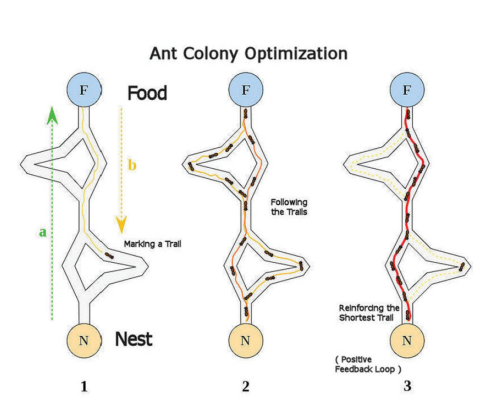

In [ ]:
from IPython.display import Image
Image('/content/aco.png')

 The ACO algorithm uses a probabilistic approach to construct candidate solutions to the TSP. The algorithm involves a colony of artificial ants that move from one city to another to construct tours. Each ant builds a tour by probabilistically selecting the next city to visit based on the pheromone trail and the distance between cities
The pheromone trail represents the amount of "goodness" associated with a particular edge in the graph. The pheromone trail is updated in real-time as the ants construct their tours. The more ants that travel along a particular edge, the stronger the pheromone trail becomes. The pheromone trail strength is also decreased over time by a process called pheromone evaporation.

The probability that an ant chooses a particular edge to travel is determined by a combination of two factors: the pheromone trail strength and the distance between cities. The pheromone trail strength encourages the ants to choose edges that have beentraveled by other ants, while the distance between cities discourages the ants from choosing edges that are long. The combination of these factors can be modeled using a probabilistic formula, such as the following:

$$p_{ij} = \frac{[\tau_{ij}(t)]^\alpha \cdot [\eta_{ij}]^\beta}{\sum_{k\in N_i} [\tau_{ik}(t)]^\alpha \cdot [\eta_{ik}]^\beta}$$

where $p_{ij}$ is the probability that an ant at city $i$ will move to city $j$, $\tau_{ij}(t)$ is the pheromone trail strength on edge $(i,j)$ at time $t$, $\eta_{ij}$ is the distance between cities $i$ and $j$, and $N_i$ represents the set of neighboring cities of city $i$. The parameters $\alpha$ and $\beta$ control the relative importance of the pheromone trail and the distance in the decision-making process of the ants.

Once an ant has completed a tour, the pheromone trail is updated based on the quality of the solution. The amount of pheromone deposited on an edge is proportional to the quality of the tour that includes that edge. The pheromone trail is also subject to evaporation over time, which prevents the pheromone trail from becoming too strong.

The ACO algorithm typically involves multiple iterations, wherethe ants construct candidate solutions and update the pheromone trail based on the quality of the tours they build. At the end of each iteration, the best tour found by the ants is extracted and used to update the global best tour. The algorithm terminates when a stopping criterion is met, such as a maximum number of iterations or a time limit.

# Exploration vs Exploitation

the parameters $\alpha$ and $\beta$ control the relative importance of the pheromone trail and the distance between cities in the decision-making process of the ants.

The parameter $\alpha$ determines the degree to which the ants are attracted to the pheromone trail. A higher value of $\alpha$ means that the ants are more likely to choose edges with a stronger pheromone trail, thereby favoring exploitation of the best solutions found so far. On the other hand, a lower value of $\alpha$ means that the ants are more likely to explore new edges, thereby favoring exploration of the search space.

The parameter $\beta$ determines the degree to which the ants are attracted to the distance between cities. A higher value of $\beta$ means that the ants are more likely to choose shorter edges, favoring exploitation of the best solutions found so far. Conversely, a lower value of $\beta$ means that the ants are more likely to explore longer edges, favoring exploration of the search space.

The choice of $\alpha$ and $\beta$ depends on the problem instance and the desired balance between exploration and exploitation. A high value of $\alpha$ and a low value of $\beta$ may be appropriate if the goal is to converge quickly to a good solution, while a low value of $\alpha$ and a high value of $\beta$ may be appropriateif the goal is to explore the search space more thoroughly to find better solutions.

Overall, the balance between exploration and exploitation is an important consideration in the ACO algorithm and in many other optimization algorithms. Too much exploration can lead to slow convergence and a failure to find good solutions, while too much exploitation can lead to premature convergence to local optima and a failure to explore the search space thoroughly. The choice of parameters like $\alpha$ and $\beta$ can help to strike a balance between these two competing goals.

In [ ]:
import math
import random
from matplotlib import pyplot as plt

In [ ]:
class SolveTSPUsingACO: #super class

    class Edge:
        def __init__(self, a, b, weight, initial_pheromone):
            self.a = a
            self.b = b
            self.weight = weight
            self.pheromone = initial_pheromone

    class Ant:
        def __init__(self, alpha, beta, num_nodes, edges):
            self.alpha = alpha
            self.beta = beta
            self.num_nodes = num_nodes
            self.edges = edges
            self.tour = None
            self.distance = 0.0

        def _select_node(self):
            roulette_wheel = 0.0
            unvisited_nodes = [node for node in range(self.num_nodes) if node not in self.tour]
            heuristic_total = 0.0
            for unvisited_node in unvisited_nodes:
                heuristic_total += self.edges[self.tour[-1]][unvisited_node].weight
            for unvisited_node in unvisited_nodes:
                roulette_wheel += pow(self.edges[self.tour[-1]][unvisited_node].pheromone, self.alpha) * pow((heuristic_total / self.edges[self.tour[-1]][unvisited_node].weight), self.beta)
            random_value = random.uniform(0.0, roulette_wheel)

            wheel_position = 0.0
            for unvisited_node in unvisited_nodes:
                wheel_position += pow(self.edges[self.tour[-1]][unvisited_node].pheromone, self.alpha) * pow((heuristic_total / self.edges[self.tour[-1]][unvisited_node].weight), self.beta)
                if wheel_position >= random_value:
                    return unvisited_node

        def find_tour(self): #return a list of visited cities
            self.tour = [random.randint(0, self.num_nodes - 1)]
            while len(self.tour) < self.num_nodes:
                self.tour.append(self._select_node())
            return self.tour

        def get_distance(self): # return a tour distance
            self.distance = 0.0
            for i in range(self.num_nodes):
                self.distance += self.edges[self.tour[i]][self.tour[(i + 1) % self.num_nodes]].weight
            return self.distance

    def __init__(self, colony_size=10, alpha=1.0, beta=3.0,
                 rho=0.1, pheromone_deposit_weight=1.0, initial_pheromone=1.0, steps=100, nodes=None, labels=None):

        self.colony_size = colony_size #ant population number
        self.rho = rho
        self.pheromone_deposit_weight = pheromone_deposit_weight
        self.steps = steps #steps taken by ants
        self.num_nodes = len(nodes)
        self.nodes = nodes
        if labels is not None:
            self.labels = labels
        else:
            self.labels = range(1, self.num_nodes + 1)
        self.edges = [[None] * self.num_nodes for _ in range(self.num_nodes)]
        for i in range(self.num_nodes):
            for j in range(i + 1, self.num_nodes):
                self.edges[i][j] = self.edges[j][i] = self.Edge(i, j, math.sqrt(
                    pow(self.nodes[i][0] - self.nodes[j][0], 2.0) + pow(self.nodes[i][1] - self.nodes[j][1], 2.0)),
                                                                initial_pheromone)
        self.ants = [self.Ant(alpha, beta, self.num_nodes, self.edges) for _ in range(self.colony_size)]
        self.global_best_tour = None
        self.global_best_distance = float("inf") #float("inf") = infinity

    def _add_pheromone(self, tour, distance, weight=1.0): #phermone marking
        pheromone_to_add = self.pheromone_deposit_weight / distance
        for i in range(self.num_nodes):
            self.edges[tour[i]][tour[(i + 1) % self.num_nodes]].pheromone += pheromone_to_add

    def _acs(self): #updating the phermone marking and computingthe optimal distance
        for step in range(self.steps):
            for ant in self.ants:
                self._add_pheromone(ant.find_tour(), ant.get_distance())
                if ant.distance < self.global_best_distance:
                    self.global_best_tour = ant.tour
                    self.global_best_distance = ant.distance
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    self.edges[i][j].pheromone *= (1.0 - self.rho)
################################################################################################





####################################  Results  ####################################################

    def run(self):
        print('Started : ACS')
        self._acs()

        print('Ended : ACS')
        print('Sequence : <- {0} ->'.format(' - '.join(str(self.labels[i]) for i in self.global_best_tour)))
        print('Total distance travelled to complete the tour : {0}\n'.format(round(self.global_best_distance, 2)))
############################################################################################################




        ############################### GRAPH ##########################################


    def plot(self, line_width=1, point_radius=math.sqrt(2.0), annotation_size=8, dpi=120, save=True, name=None):
        x = [self.nodes[i][0] for i in self.global_best_tour]
        x.append(x[0])
        y = [self.nodes[i][1] for i in self.global_best_tour]
        y.append(y[0])
        plt.plot(x, y, linewidth=line_width)
        plt.scatter(x, y, s=math.pi * (point_radius ** 2.0))
        plt.title('ACS')
        for i in self.global_best_tour:
            plt.annotate(self.labels[i], self.nodes[i], size=annotation_size)
        if save:
            if name is None:
                name = 'ACS.png'
            plt.savefig(name, dpi=dpi)
        plt.show()
        plt.gcf().clear()


Started : ACS
Ended : ACS
Sequence : <- 12 - 13 - 7 - 6 - 5 - 16 - 4 - 2 - 8 - 9 - 10 - 3 - 18 - 17 - 19 - 20 - 11 - 14 - 1 - 15 ->
Total distance travelled to complete the tour : 11850.29



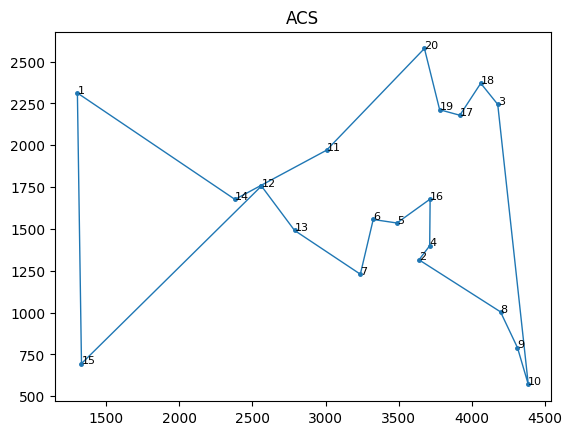

<Figure size 640x480 with 0 Axes>

In [ ]:
#main
_colony_size = 500
_steps = 10
cities = []
_nodes = []
with open('/content/cities.txt') as f:
        for line in f.readlines():
            city = line.split(' ')
            cities.append(dict(index=int(city[0]), x=int(city[1]), y=int(city[2])))
            _nodes.append((int(city[1]), int(city[2])))

acs = SolveTSPUsingACO(colony_size=_colony_size, steps=_steps, nodes=_nodes)
acs.run()
acs.plot()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
cities = []
_nodes = []
with open("/content/cities.txt") as f:
    for line in f.readlines():
        city = line.split(' ')
        cities.append(dict(index=int(city[0]), x=int(city[1]), y=int(city[2])))
        _nodes.append((int(city[1]), int(city[2])))
L=[]
colony_sizes = [10,20,100,200,500]
for _colony_size in colony_sizes:
    acs = SolveTSPUsingACO(colony_size=_colony_size, steps=10, nodes=_nodes)
    acs.run()
    L.append(acs.global_best_distance)
L=np.array(L)




Started : ACS
Ended : ACS
Sequence : <- 10 - 9 - 8 - 4 - 2 - 7 - 6 - 5 - 16 - 3 - 18 - 17 - 19 - 20 - 11 - 13 - 12 - 14 - 15 - 1 ->
Total distance travelled to complete the tour : 12625.38

Started : ACS
Ended : ACS
Sequence : <- 2 - 4 - 16 - 5 - 6 - 7 - 13 - 12 - 14 - 15 - 1 - 11 - 18 - 19 - 17 - 20 - 3 - 10 - 9 - 8 ->
Total distance travelled to complete the tour : 12478.81

Started : ACS
Ended : ACS
Sequence : <- 12 - 14 - 13 - 7 - 6 - 5 - 4 - 2 - 9 - 10 - 8 - 16 - 17 - 3 - 18 - 19 - 20 - 11 - 1 - 15 ->
Total distance travelled to complete the tour : 11992.83

Started : ACS
Ended : ACS
Sequence : <- 4 - 2 - 7 - 6 - 5 - 16 - 18 - 3 - 17 - 19 - 20 - 11 - 13 - 12 - 14 - 1 - 15 - 10 - 9 - 8 ->
Total distance travelled to complete the tour : 12027.73

Started : ACS
Ended : ACS
Sequence : <- 13 - 7 - 6 - 16 - 5 - 4 - 2 - 10 - 9 - 8 - 3 - 18 - 17 - 19 - 20 - 11 - 12 - 14 - 1 - 15 ->
Total distance travelled to complete the tour : 11734.66



In [ ]:
colony_sizes = np.array(colony_sizes)

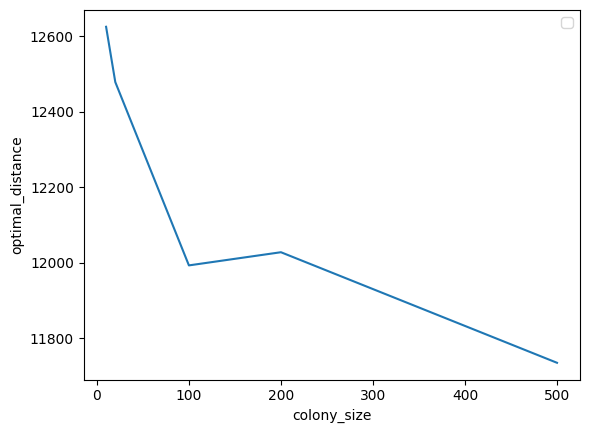

In [ ]:
plt.plot(colony_sizes,L)
plt.xlabel('colony_size')
plt.ylabel('optimal_distance')
plt.legend()

# Results interpreation

Increasing the colony size in the Ant Colony Optimization algorithm can have a significant impact on the quality of the solutions found. A larger colony size means that more ants are exploring the search space in parallel, which can lead to better exploration and more accurate estimation of the optimal tour.

# Credits
Mohamed Toukabri &
Omar Lahyani
2nd year SISY students

# References

1-Comparative Analysis of Ant Colony
Optimization and Genetic Algorithm in
Solving the Traveling Salesman Problem by Hatem Mohi Eddine \\
2-Ant colony optimization and reinforcement learning by Adam Price